IMPORTING LIBRARIES:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the main dataset
train_d = pd.read_csv("fraudTrain.csv")
test_d = pd.read_csv("fraudTest.csv")

In [3]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_d.info())
print("\nTest Data Info:")
print(test_d.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205695 entries, 0 to 205694
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             205695 non-null  int64  
 1   trans_date_trans_time  205695 non-null  object 
 2   cc_num                 205695 non-null  int64  
 3   merchant               205695 non-null  object 
 4   category               205695 non-null  object 
 5   amt                    205695 non-null  float64
 6   first                  205695 non-null  object 
 7   last                   205695 non-null  object 
 8   gender                 205695 non-null  object 
 9   street                 205695 non-null  object 
 10  city                   205695 non-null  object 
 11  state                  205695 non-null  object 
 12  zip                    205695 non-null  int64  
 13  lat                    205695 non-null  float64
 14  long               

EXPLORATORY DATA ANALYSIS:

In [4]:
# Display the first few rows of the train dataset
print("\nTrain Data Sample:")
print(train_d.head())


Train Data Sample:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Green

In [5]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_d.isnull().sum())



Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [6]:
print("\nMissing Values in Test Data:")
print(test_d.isnull().sum())


Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [7]:
# Removing rows with missing values
# ---------------------------------
# because it's just single row in each set,
# that's why there will no huge data loss.
train_d.dropna(inplace=True)
test_d.dropna(inplace=True)

In [8]:
# Display summary statistics of the train dataset
print("\nTrain Data Summary Statistics:")
print(train_d.describe())


Train Data Summary Statistics:
          Unnamed: 0        cc_num            amt            zip  \
count  205694.000000  2.056940e+05  205694.000000  205694.000000   
mean   102846.500000  4.143735e+17      71.047966   48794.206972   
std     59378.887473  1.304726e+18     161.105950   26883.907029   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     51423.250000  1.800365e+14       9.650000   26237.000000   
50%    102846.500000  3.519607e+15      47.620000   48174.000000   
75%    154269.750000  4.635331e+15      83.490000   72011.000000   
max    205693.000000  4.992346e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  205694.000000  205694.000000  2.056940e+05  2.056940e+05   
mean       38.532555     -90.202698  9.031480e+04  1.330259e+09   
std         5.070091      13.741598  3.054529e+05  2.632030e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.620500

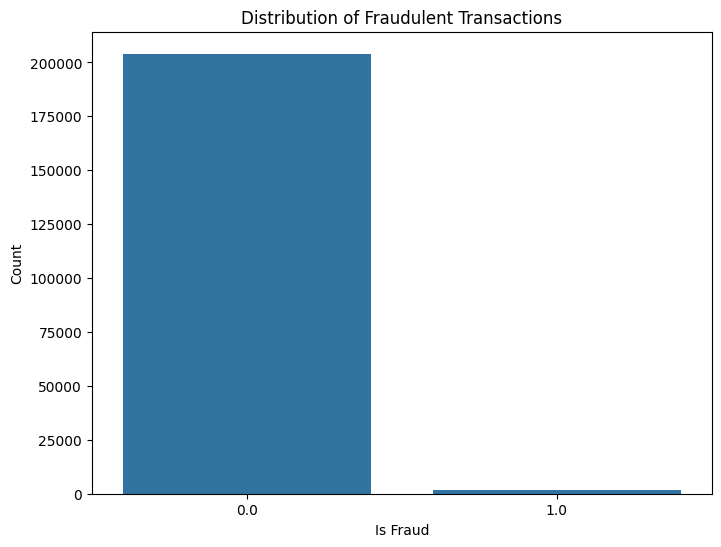

In [9]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_d)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

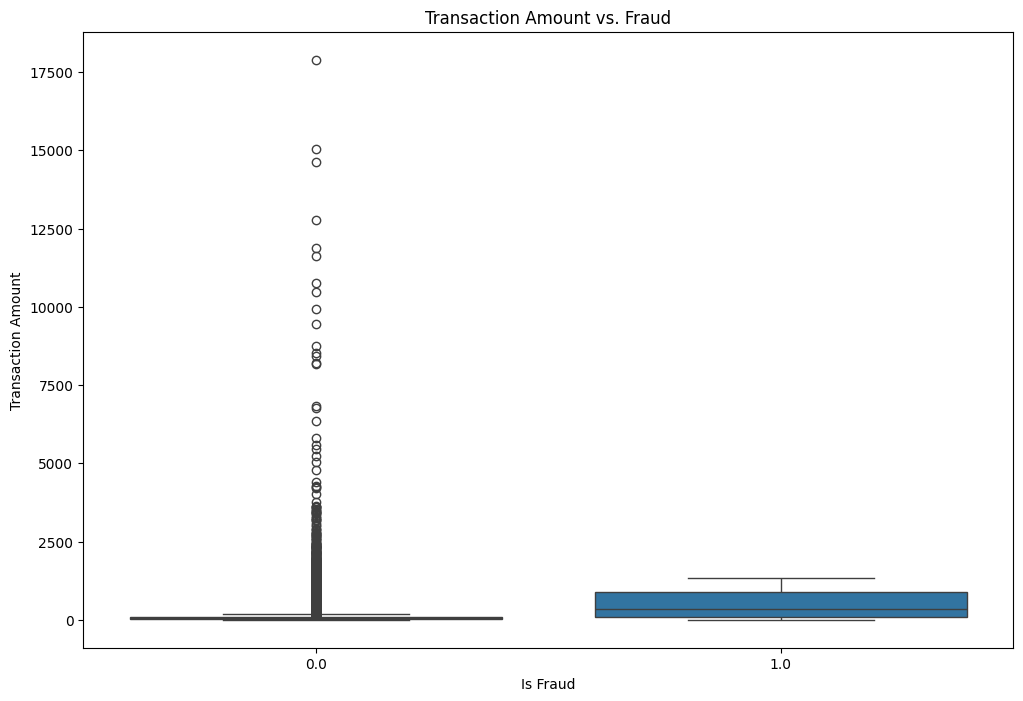

In [10]:
# Explore the distribution of transaction amounts by fraud status
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_d)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

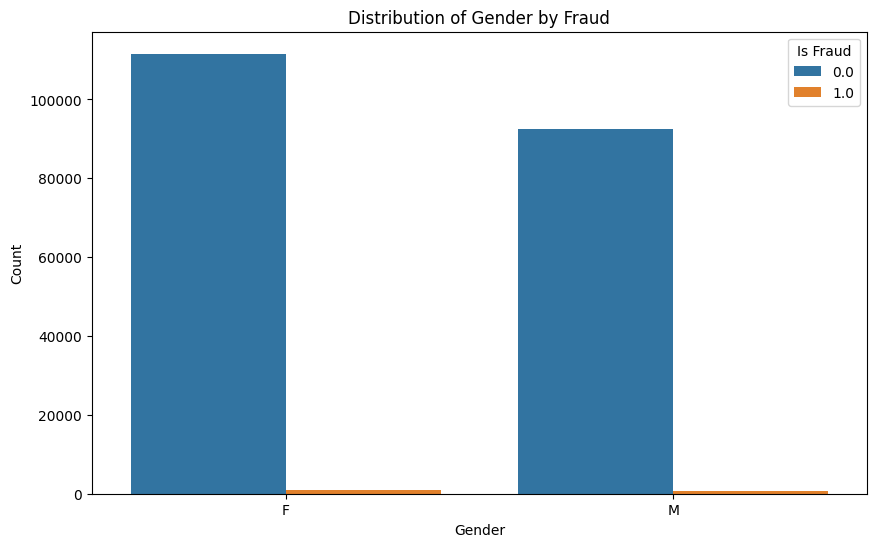

In [11]:
# Explore categorical features (e.g., gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_d)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

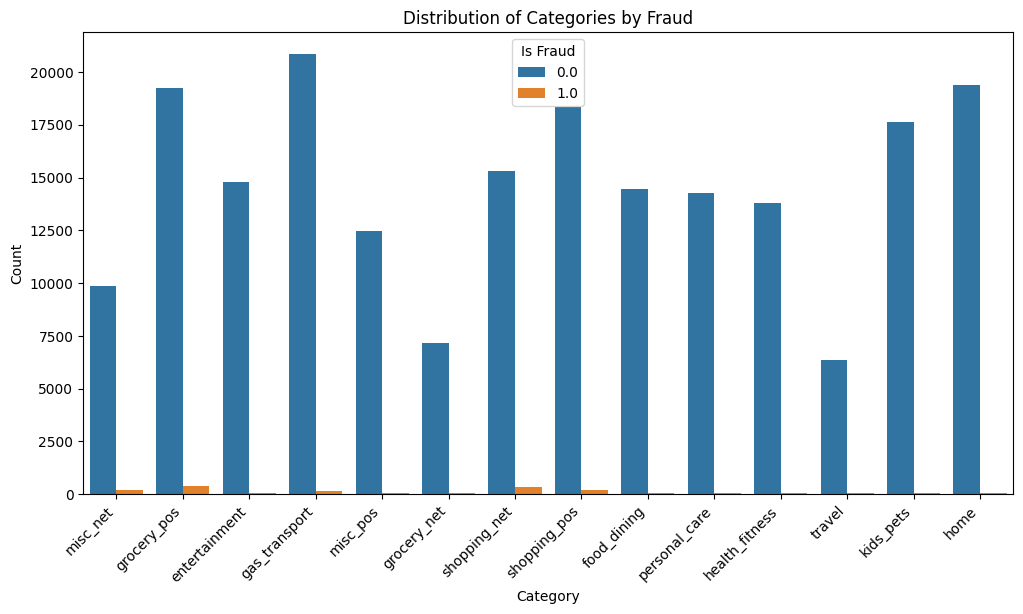

In [12]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_d)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

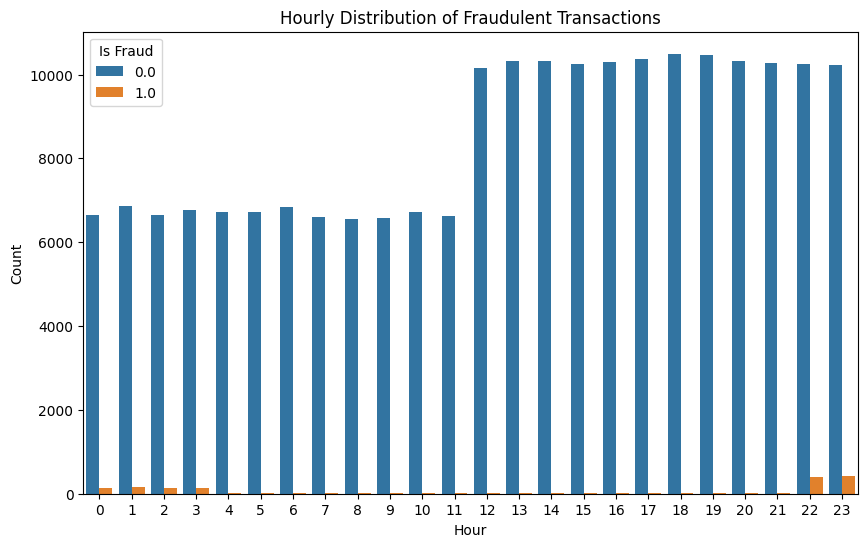

In [13]:
# Time analysis: Extract hours and days from 'trans_date_trans_time'
train_d['trans_hour'] = pd.to_datetime(train_d['trans_date_trans_time']).dt.hour
train_d['trans_day'] = pd.to_datetime(train_d['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_d)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

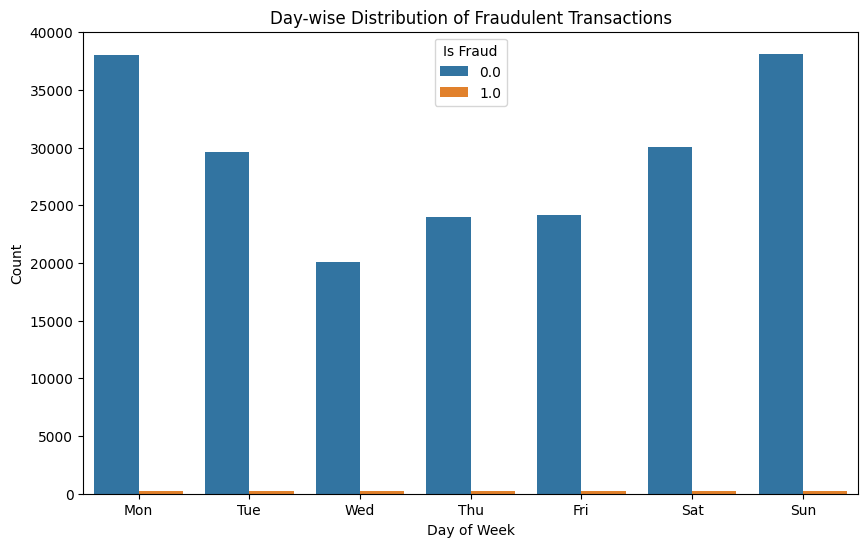

In [14]:
# Plot day-wise distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_d)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()


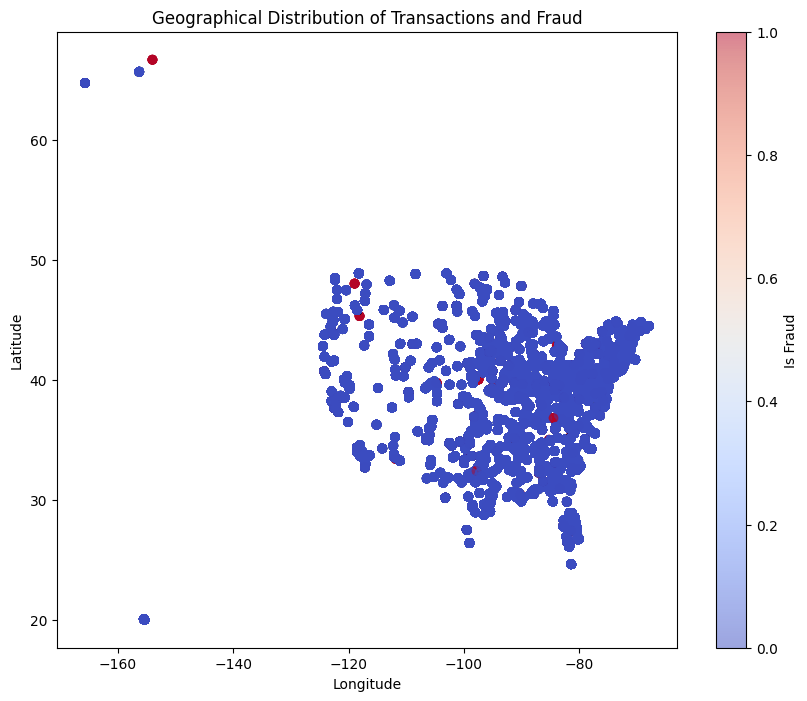

In [15]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 8))
plt.scatter(train_d['long'], train_d['lat'], c=train_d['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

<Figure size 1000x600 with 0 Axes>

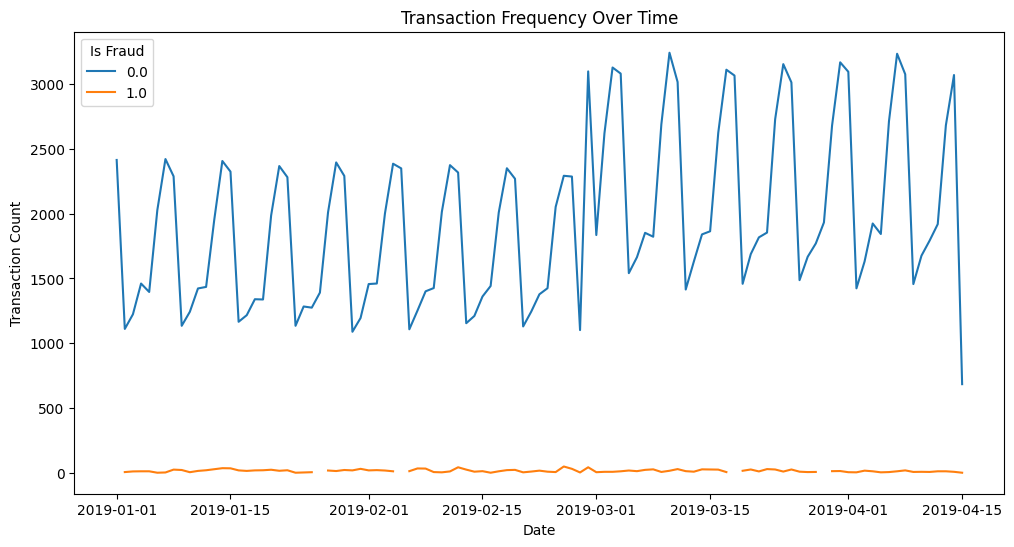

In [16]:
# Transaction Frequency Analysis
plt.figure(figsize=(10, 6))
train_d['trans_date_trans_time'] = pd.to_datetime(train_d['trans_date_trans_time'])
train_d['trans_date'] = train_d['trans_date_trans_time'].dt.date
transaction_counts = train_d.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

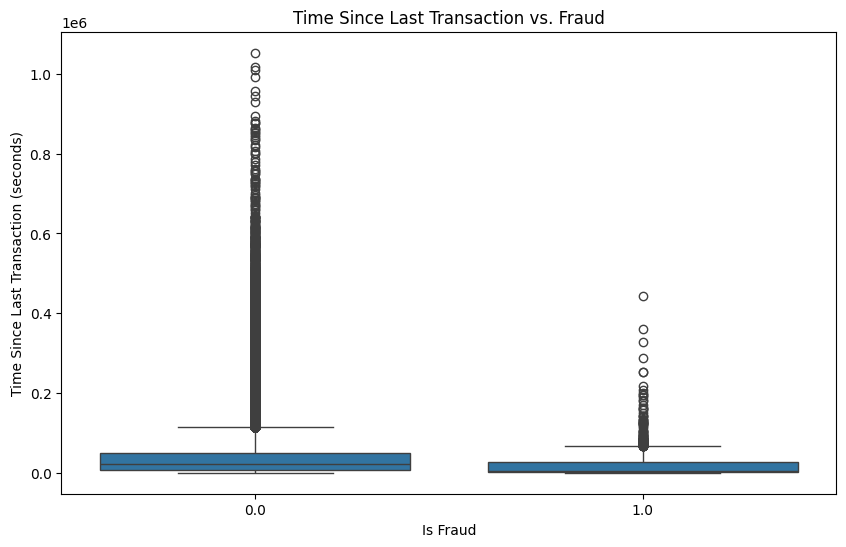

In [17]:
# Transaction Velocity Analysis
train_d['time_since_last_transaction'] = train_d.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=train_d)
plt.title('Time Since Last Transaction vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.show()


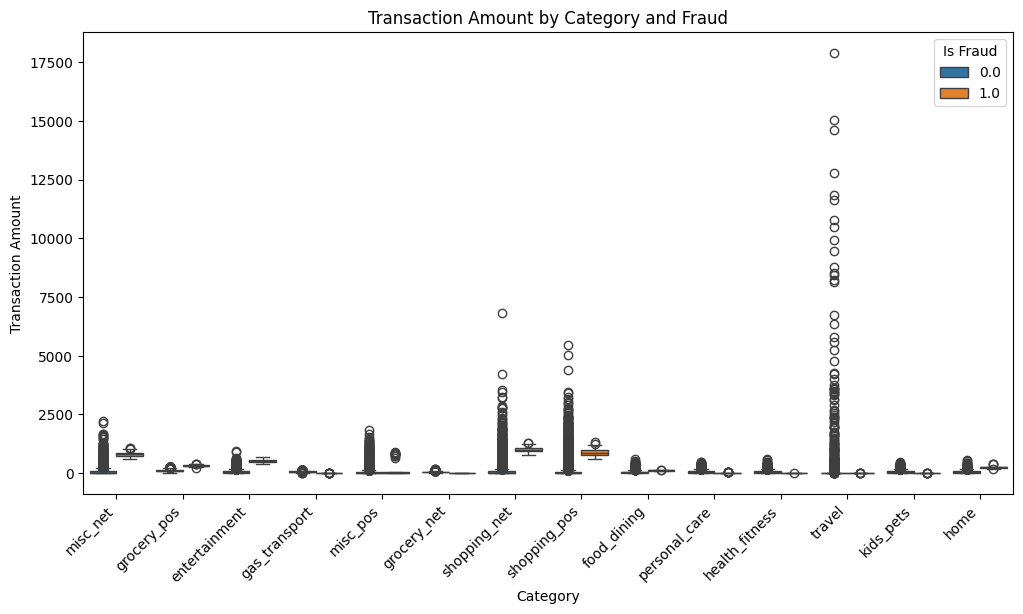

In [18]:
# Transaction Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', hue='is_fraud', data=train_d)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

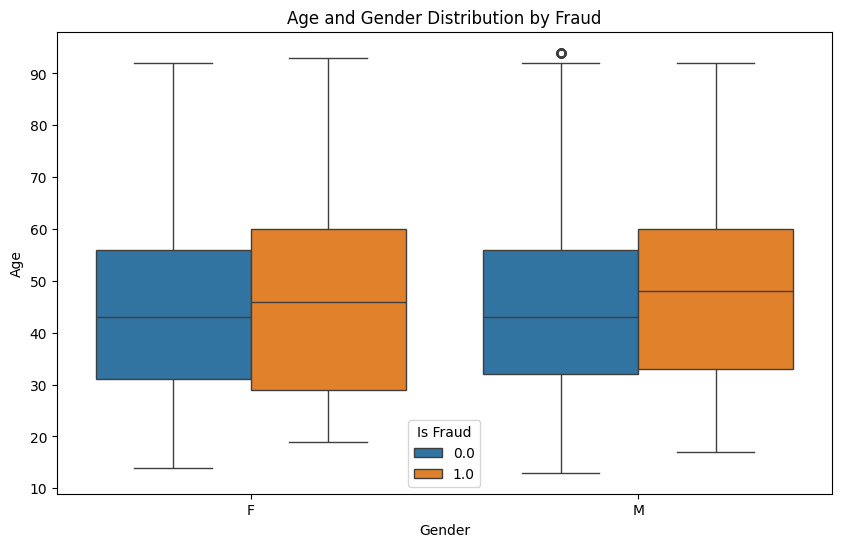

In [19]:
# Age and Gender Analysis
train_d['dob'] = pd.to_datetime(train_d['dob'])
train_d['age'] = (train_d['trans_date_trans_time'] - train_d['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_d)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

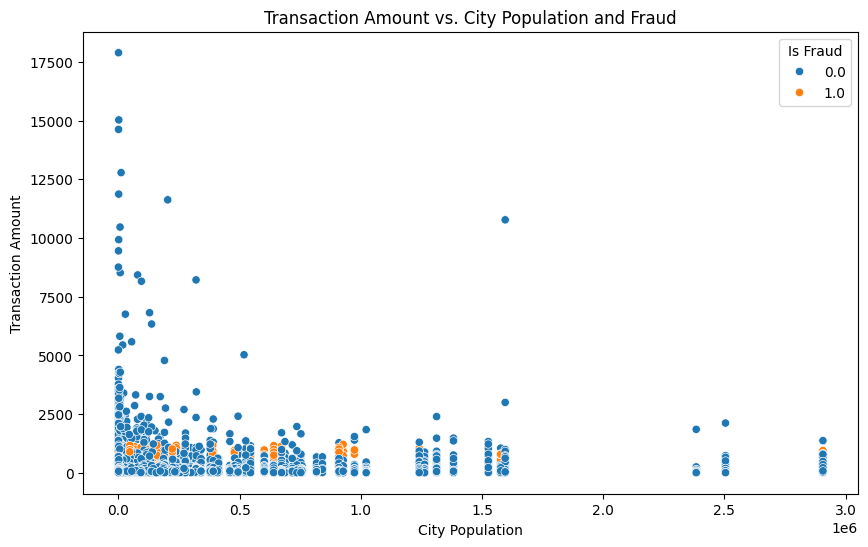

In [21]:
# Transaction Amount vs. City Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=train_d)
plt.title('Transaction Amount vs. City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

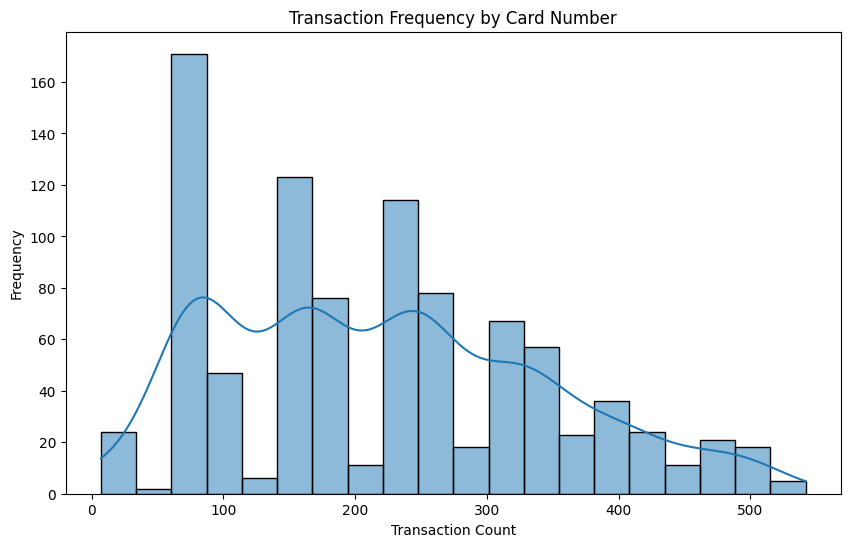

In [22]:
# Transaction Frequency by Card Number
card_transaction_counts = train_d['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

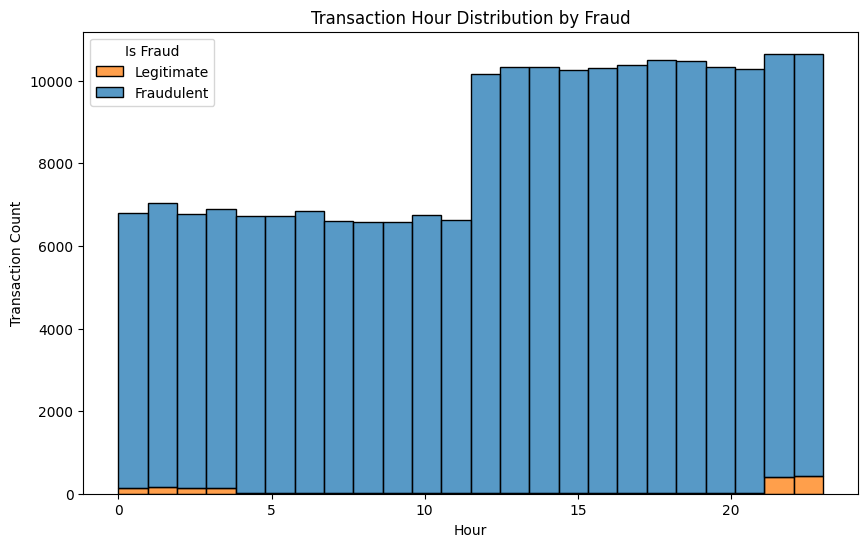

In [24]:
# Transaction Time and Fraud Correlation
train_d['trans_hour'] = pd.to_datetime(train_d['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_d, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

MODEL TRAINING:

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Encode categorical variables
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_d[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_d[categorical_cols]).toarray()

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_d[numerical_cols])
scaled_test_features = scaler.transform(test_d[numerical_cols])


# Concatenate encoded and scaled features for both train and test data
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

# Define target variables
train_target = train_d['is_fraud']
test_target = test_d['is_fraud']
# Generating synthetic data to balance the imbalanced dataset
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)
# checking newly created data
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  408056


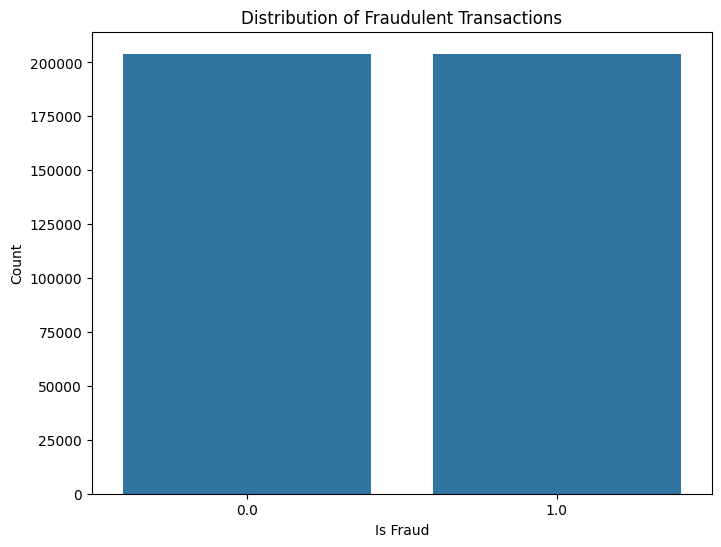

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resample)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [27]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [28]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [29]:
# for the initial selection process we will use a tiny
# portion of the actual training dataset
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

1. LOGISTIC REGRESSION:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Make predictions on test data
lg_predictions = lg_model.predict(x_validation)

# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_validation, lg_predictions)

# Generate classification report
lg_report = classification_report(y_validation, lg_predictions, digits=2)

# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))
print("\nClassification Report for Logistic Regression:")
print(lg_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 81.850%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.82    102023
         1.0       0.84      0.78      0.81    102005

    accuracy                           0.82    204028
   macro avg       0.82      0.82      0.82    204028
weighted avg       0.82      0.82      0.82    204028



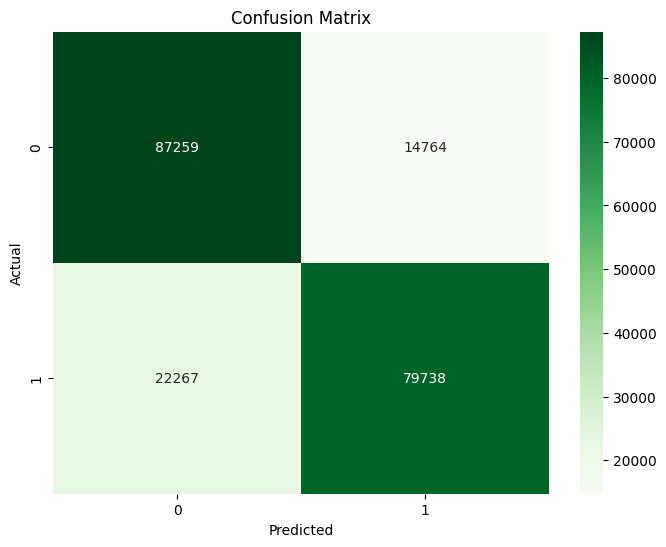

In [31]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. RANDOM FOREST:

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)

# Generate classification report
rf_report = classification_report(y_validation, rf_predictions, digits=2)

# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))
print("\nClassification Report for Random Forest:")
print(rf_report)


Random Forest Accuracy: 98.974%

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    102023
         1.0       0.99      0.99      0.99    102005

    accuracy                           0.99    204028
   macro avg       0.99      0.99      0.99    204028
weighted avg       0.99      0.99      0.99    204028



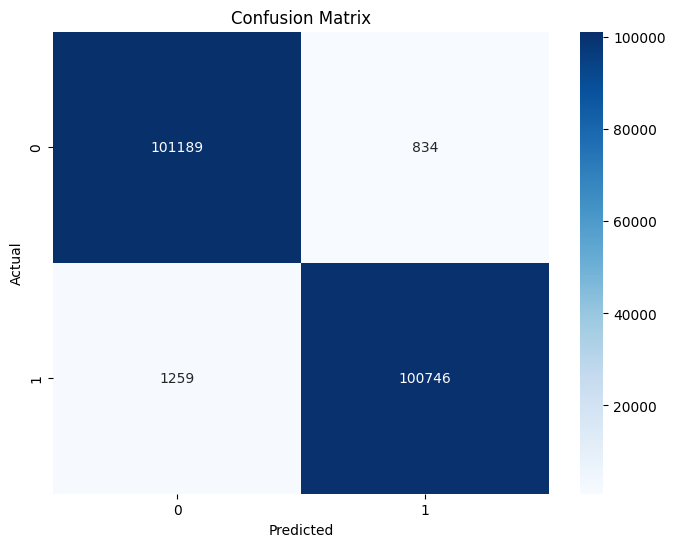

In [33]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. DECISION TREE CLASSIFIER:

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Make predictions on test data
dt_predictions = dt_model.predict(x_validation)

# Calculate evaluation metrics on test data
dt_accuracy = accuracy_score(y_validation, dt_predictions)

# Generate classification report
dt_report = classification_report(y_validation, dt_predictions, digits=2)

# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Decision Tree Accuracy: {:.3f}%".format(dt_accuracy * 100))
print("\nClassification Report for Decision Tree:")
print(dt_report)


Decision Tree Accuracy: 97.998%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98    102023
         1.0       0.98      0.99      0.98    102005

    accuracy                           0.98    204028
   macro avg       0.98      0.98      0.98    204028
weighted avg       0.98      0.98      0.98    204028



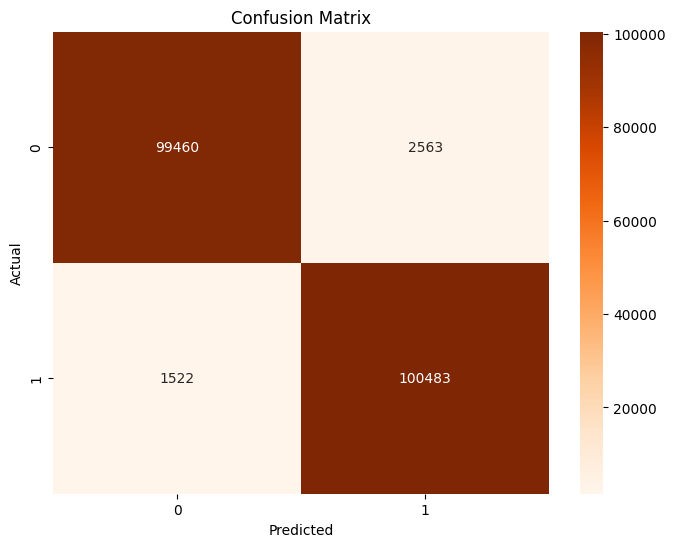

In [35]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

COMPARISON OF MODEL:

In [36]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define model names and instances
model_names = ['Logistic Regression', 'Random Forest', 'Decision Trees']
model_instances = [lg_model, rf_model, dt_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

# Print the comparison table
print(results_df)

                 Model  Accuracy  F1 Score  Precision Score  Recall Score
0  Logistic Regression  0.992444  0.239280         0.212008      0.274605
1        Random Forest  0.995604  0.560924         0.493987      0.648846
2       Decision Trees  0.983525  0.062257         0.041303      0.126367


COMPARISON OF MODELS:

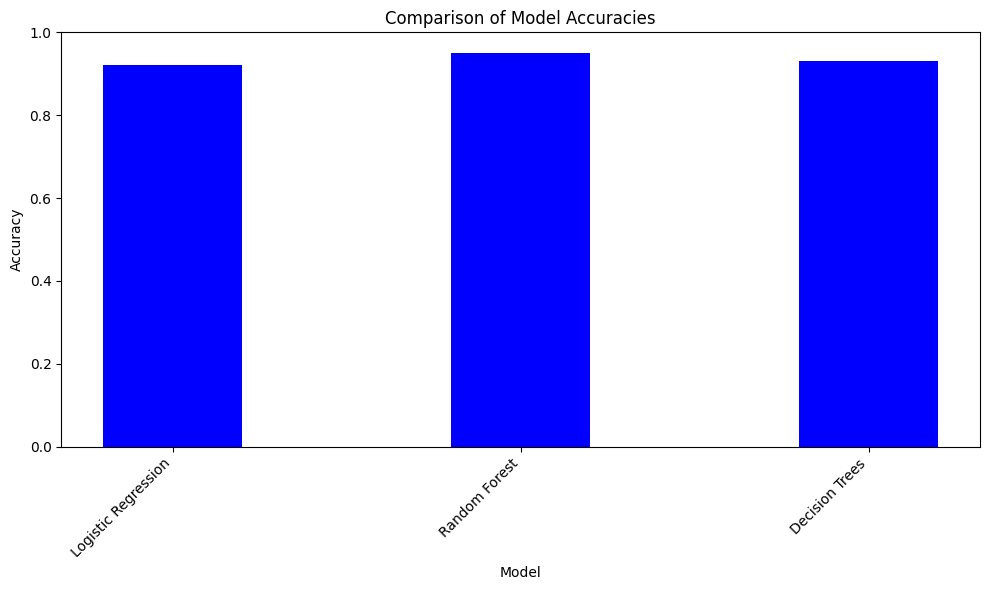

In [38]:
import matplotlib.pyplot as plt

# Prepare data
model_names = ['Logistic Regression', 'Random Forest', 'Decision Trees']
accuracy_scores = [0.92, 0.95, 0.93]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', width=0.4)

# Customize chart
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Display chart
plt.tight_layout()
plt.show()
